In [1]:
# Implementing Quantum circuits using Qiskit tools 
# other required tools :
# Anaconda Navigator 
# jupyter
# Qiskit library
# Mohadeseh ;)

In [2]:
from qiskit import * #importing library

In [3]:
# Design of a Quantum-Repeater using Quantum-Circuits and Benchmarking its Performance on an IBM Quantum-Computer

In [4]:
# The main aim of Quantum Communication is to transmitt information(or entangled photons) over long distances.
# Due to the fragile nature of photons and the noisy channel, Propagating Quantum information is hard to do.

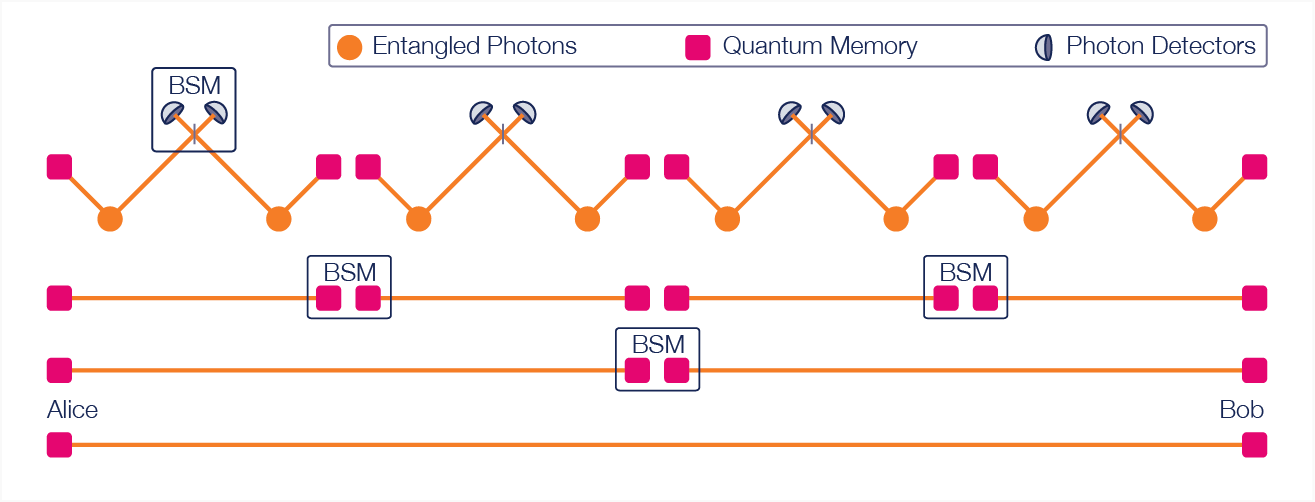

In [5]:
#quantum entanglement allows Quantum Communication to perform some protocols which are somehow impossible in classic terms

In [6]:
#For instance *Quantum teleportation*

In [7]:
Qb = QuantumRegister(3)
Cb = ClassicalRegister(3)

In [8]:
# apart from Qbits (Quantum bits) we need classical bits as well to store measurement results

In [9]:
circuit = QuantumCircuit(Qb,Cb)

| φ> = α |0> + β |1>
$$\begin{bmatrix} α \\ β \end{bmatrix}$$

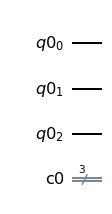

In [10]:
%matplotlib inline
circuit.draw(output = 'mpl')
#here Q0 form Quantum Register

In [11]:
# linear operators : they act within the vector space
# Identity operators : I
# Unitary operator : SS^† = I
# Hermition operator : H = H^†
# normal operator : T T^† = T^† T

In [12]:
#now we want to apply X operator to our first Qubit
circuit.x(Qb[0])

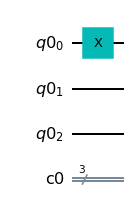

In [13]:
circuit.draw(output='mpl')

In [14]:
from qiskit.tools.visualization import plot_bloch_multivector 

In [15]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()

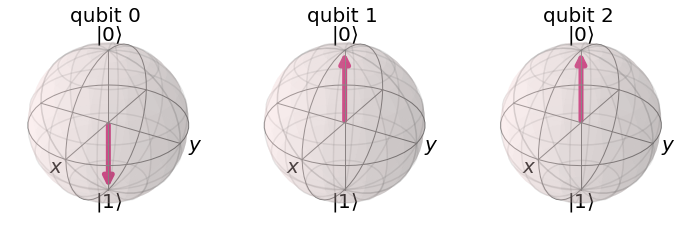

In [16]:
plot_bloch_multivector(statevector)

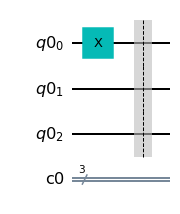

In [17]:
#we can put a barrier in our draw plot so that we can divide different stages
circuit.barrier()
circuit.draw(output = 'mpl')

In [18]:
circuit.h(Qb[1])
# first we need to make the control qubit (|0> + |1>)/sqrt(2)

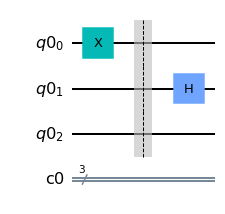

In [19]:
circuit.draw(output = 'mpl')

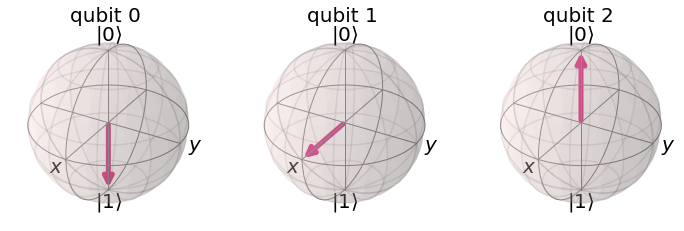

In [20]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend = simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

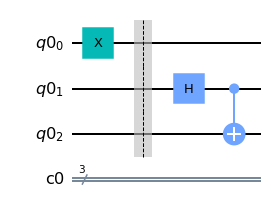

In [21]:
circuit.cx(1,2)
circuit.draw(output = 'mpl')

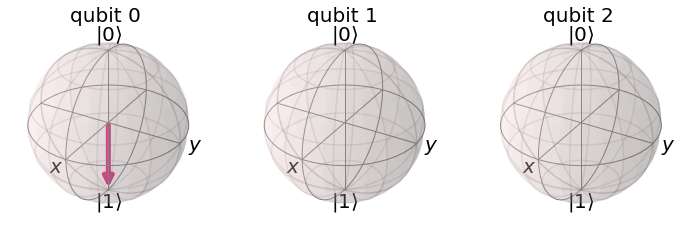

In [22]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend = simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)
#Q[1] and Q[2] are now entangled 

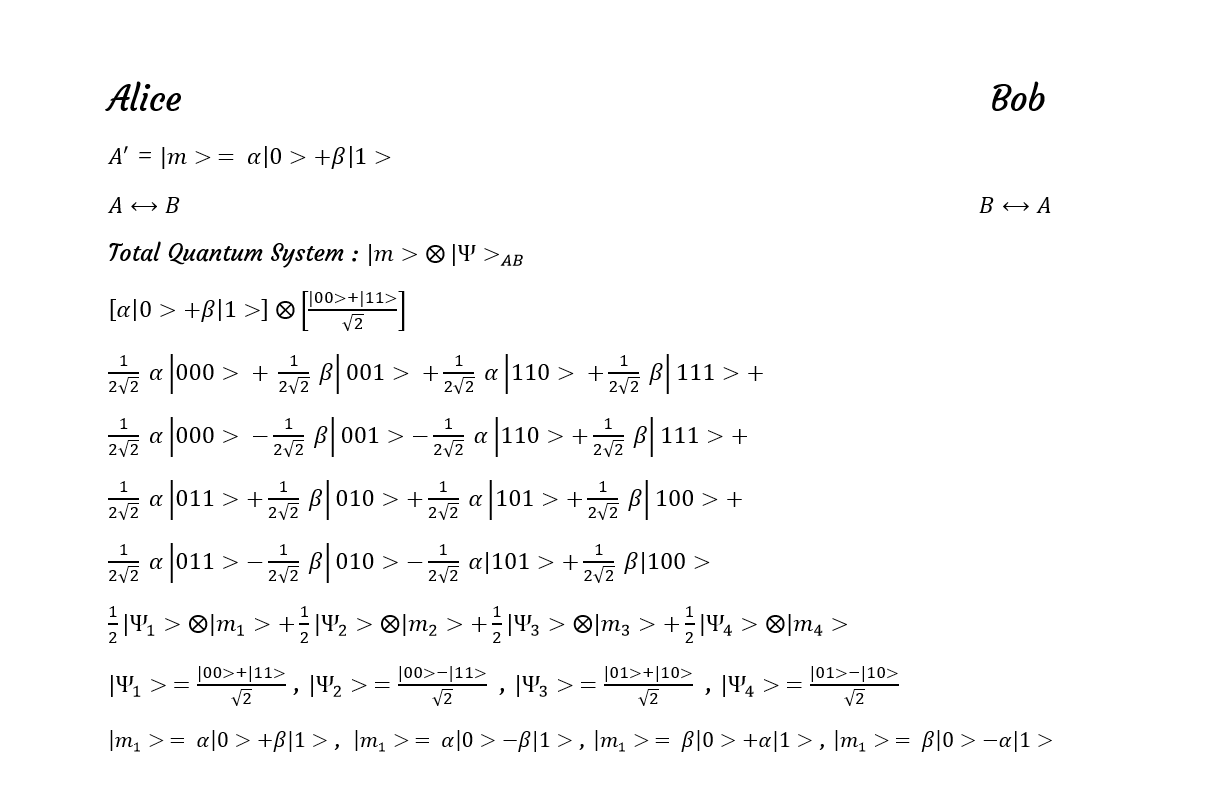

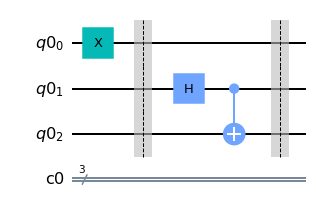

In [23]:
circuit.barrier()
circuit.draw(output = 'mpl')

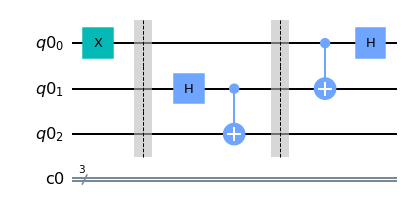

In [24]:
circuit.cx(0,1)
circuit.h(Qb[0])
circuit.draw(output = 'mpl')

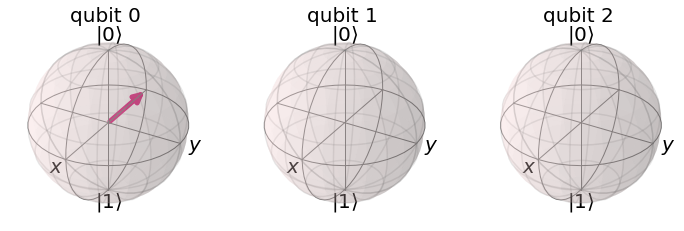

In [25]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector =result.get_statevector()
plot_bloch_multivector(statevector)

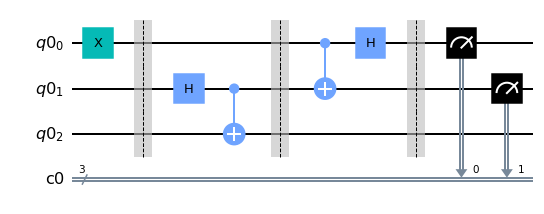

In [26]:
circuit.barrier()
circuit.measure(Qb[0],Cb[0])
circuit.measure(Qb[1],Cb[1])
circuit.draw(output = 'mpl')

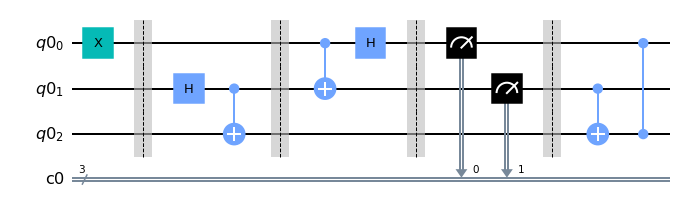

In [27]:
circuit.barrier()
circuit.cx(1,2) #flip
circuit.cz(0,2) #phase - shift
circuit.draw(output = 'mpl')

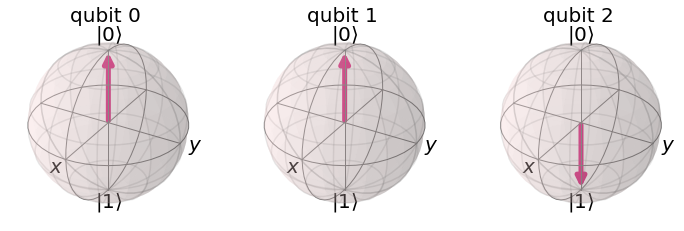

In [28]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector =result.get_statevector()
plot_bloch_multivector(statevector)

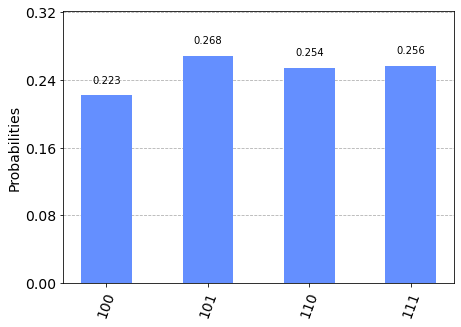

In [29]:
circuit.measure(Qb[2],Cb[2])
circuit.measure(Qb[1],Cb[1])
circuit.measure(Qb[0],Cb[0])
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots= 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [30]:
#Reapeters

In [31]:
#Simulating Quantum protocols with classical tools demands big deal of infrastructure 

In [32]:
#EPR pair

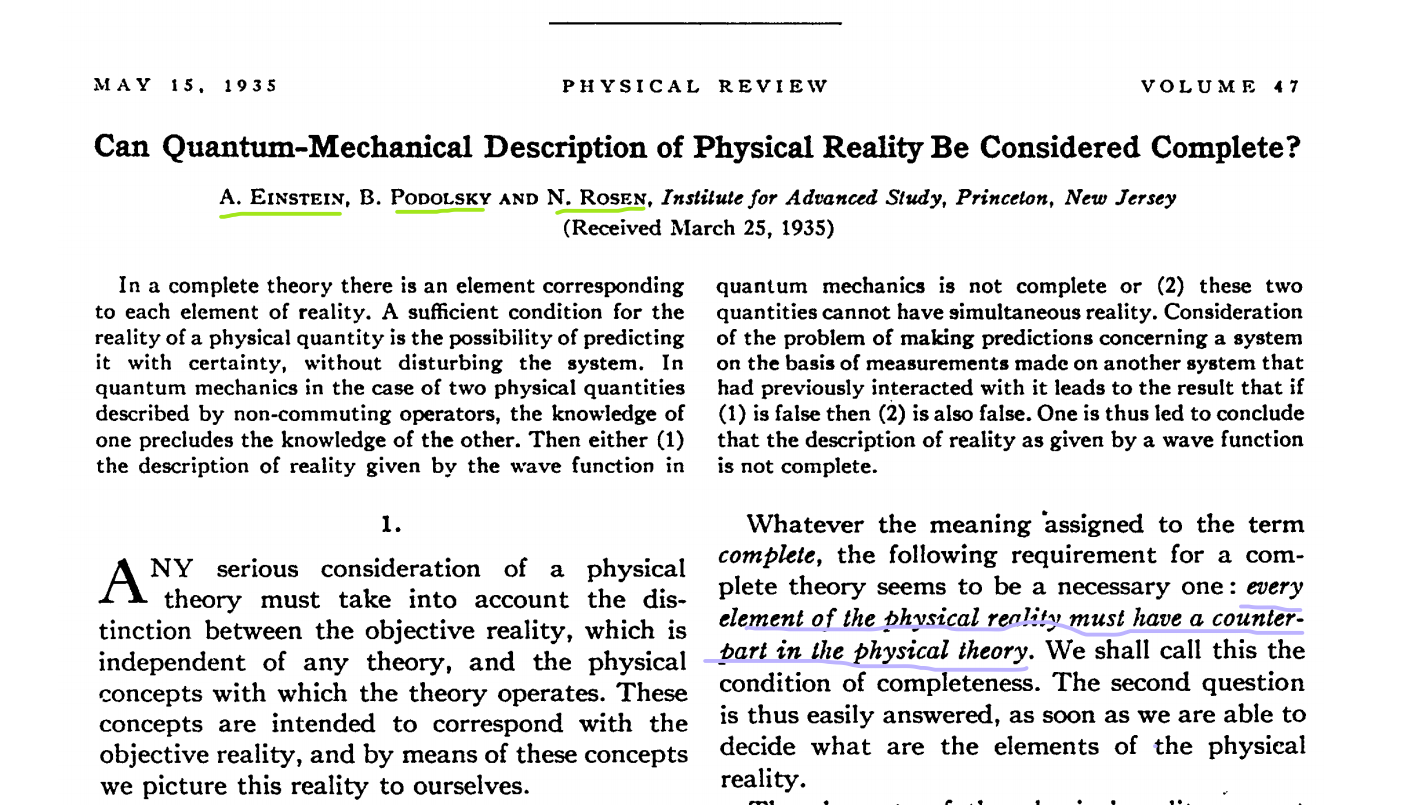

In [33]:
# the results are correlated 

In [34]:
# How C_NOT Gate create entanglement

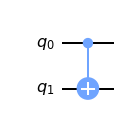

In [35]:
qtest = QuantumCircuit(2)
# Apply CNOT
qtest.cx(0,1)
# See the circuit:
qtest.draw(output = 'mpl')

$\frac{|00>± |11>}{√(2 )}$

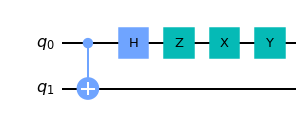

In [36]:
qtest.h(0)
qtest.z(0)
qtest.x(0)
qtest.y(0)
# Universal Gates 
# We can build any circuit using these gates 
qtest.draw(output = 'mpl')

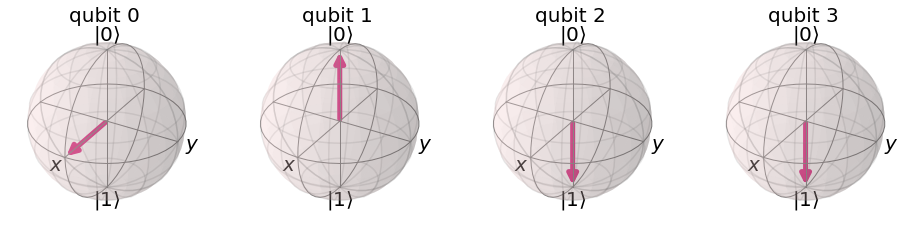

In [37]:
circuit = QuantumCircuit(4)
circuit.h(0)
circuit.z(1)
circuit.x(2)
circuit.y(3)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit,backend=simulator).result()
statevector =result.get_statevector()
plot_bloch_multivector(statevector)

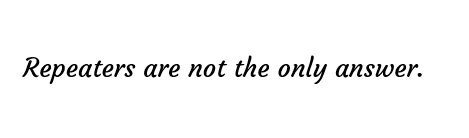

In [38]:
# the loss of Quantum channels are followed by : e^(l/l_0)
# fidelity

$ F(\rho , \sigma) = ( tr \sqrt{\sqrt{\rho} \sigma \sqrt{\rho}} )^2 $

In [39]:
 # F is the probability that ρ can be mistaken with σ 

In [40]:
 # apart from repeater, a purification method is needed

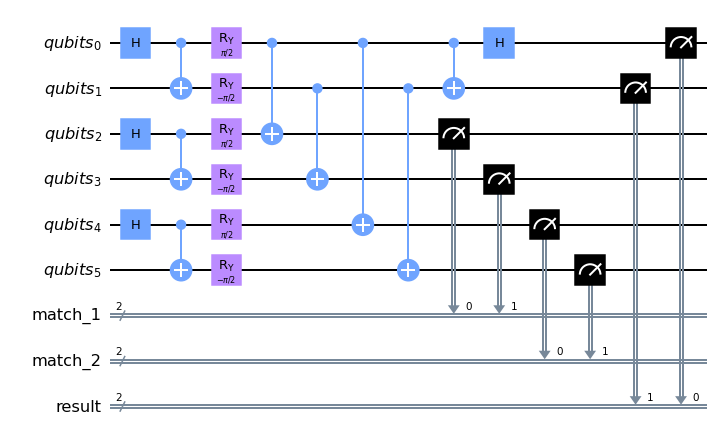

In [4]:
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector 
from qiskit.tools.visualization import plot_histogram
from math import pi
#Circuit
A = QuantumRegister(6, 'qubits')
ma = ClassicalRegister(2, 'match_1')
mb = ClassicalRegister(2, 'match_2')
r = ClassicalRegister(2, 'result')
Circuit = QuantumCircuit(A, ma, mb, r)
#H
Circuit.h(A[0])
Circuit.h(A[2])
Circuit.h(A[4])
#CNOT
Circuit.cx(A[0],A[1])
Circuit.cx(A[2],A[3])
Circuit.cx(A[4],A[5])
#R
Circuit.ry(pi/2,A[0])
Circuit.ry(-pi/2,A[1])
Circuit.ry(pi/2,A[2])
Circuit.ry(-pi/2,A[3])
Circuit.ry(pi/2,A[4])
Circuit.ry(-pi/2,A[5])
#CNOT
Circuit.cx(A[0],A[2])
Circuit.cx(A[0],A[4])
Circuit.cx(A[1],A[3])
Circuit.cx(A[1],A[5])
#measurement 
Circuit.measure(A[2],ma[0])
Circuit.measure(A[4],mb[0])
Circuit.measure(A[3],ma[1])
Circuit.measure(A[5],mb[1])
#Enatngelemt 
Circuit.cx(A[0],A[1])
Circuit.h(A[0])
#result
Circuit.measure(A[1],r[1])
Circuit.measure(A[0],r[0])
Circuit.draw(output='mpl')

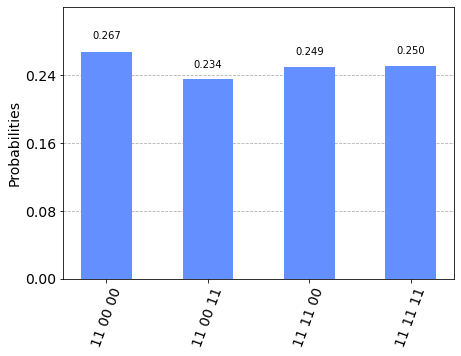

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(Circuit,backend = simulator, shots= 1024).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [6]:
import qiskit.providers.aer.noise as noise
# Error probabilities
prob_1 = 0.01  # 1-qubit gate
prob_2 = 0.1   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

# Add errors to noise model
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

In [7]:
#Circuit
A = QuantumRegister(6, 'qubits')
ma = ClassicalRegister(2, 'match_1')
mb = ClassicalRegister(2, 'match_2')
r = ClassicalRegister(2, 'result')
Circuit = QuantumCircuit(A, ma, mb, r)
#H
Circuit.h(A[0])
Circuit.h(A[2])
Circuit.h(A[4])
#CNOT
Circuit.cx(A[0],A[1])
Circuit.cx(A[2],A[3])
Circuit.cx(A[4],A[5])
#R
Circuit.ry(pi/2,A[0])
Circuit.ry(-pi/2,A[1])
Circuit.ry(pi/2,A[2])
Circuit.ry(-pi/2,A[3])
Circuit.ry(pi/2,A[4])
Circuit.ry(-pi/2,A[5])
#CNOT
Circuit.cx(A[0],A[2])
Circuit.cx(A[0],A[4])
Circuit.cx(A[1],A[3])
Circuit.cx(A[1],A[5])
#measurement 
Circuit.measure(A[2],ma[0])
Circuit.measure(A[4],mb[0])
Circuit.measure(A[3],ma[1])
Circuit.measure(A[5],mb[1])
#Enatngelemt 
Circuit.cx(A[0],A[1])
Circuit.h(A[0])
#result
Circuit.measure(A[1],r[1])
Circuit.measure(A[0],r[0])

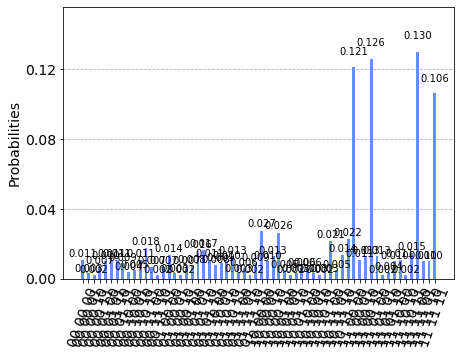

In [8]:
# Perform a noise simulation
result = execute(Circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model,shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

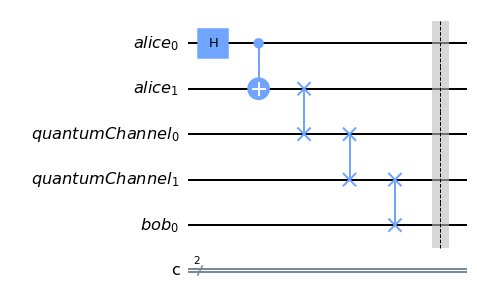

In [50]:
A = QuantumRegister(2, 'alice')
C = QuantumRegister(2, 'quantumChannel')
B = QuantumRegister(1, 'bob')
cl = ClassicalRegister(2, 'c')
Circuit = QuantumCircuit(A, C, B, cl)
# perform entanglement algorithm
Circuit.h(A[0])
Circuit.cx(A[0],A[1])
Circuit.swap(A[1],C[0])
Circuit.swap(C[0],C[1])
Circuit.swap(C[1],B)
Circuit.barrier()
Circuit.draw(output='mpl')

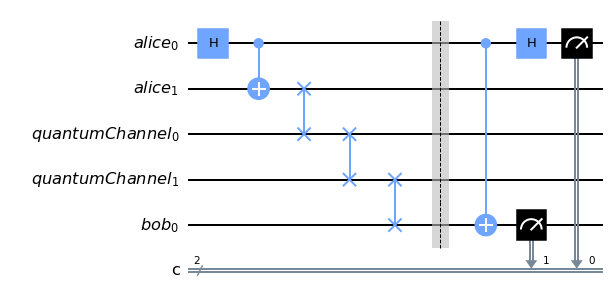

In [51]:
# measurement
# inverse entanglement
Circuit.cx(A[0],B)
Circuit.h(A[0])
Circuit.measure(A[0],cl[0])
Circuit.measure(B,cl[1])
Circuit.draw(output = 'mpl')

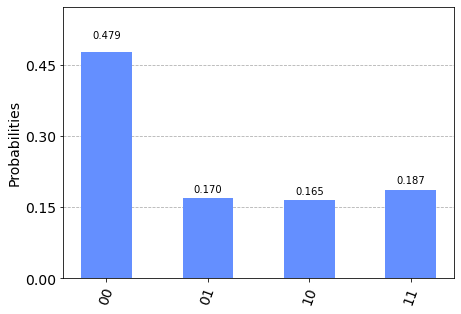

In [52]:
# Perform a noise simulation
result = execute(Circuit, Aer.get_backend('qasm_simulator'),
                 basis_gates=basis_gates,
                 noise_model=noise_model,shots = 1024).result()
counts = result.get_counts()
plot_histogram(counts)

In [53]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(Circuit,backend=simulator).result()
statevector =result.get_statevector()

In [54]:
A = QuantumRegister(2, 'alice')
C = QuantumRegister(2, 'quantumChannel')
B = QuantumRegister(1, 'bob')
cl = ClassicalRegister(2, 'c')
CircuitB = QuantumCircuit(A, C, B, cl)
CircuitB.h(A[0])  # perform entanglement algorithm
CircuitB.cx(A[0],A[1])
CircuitB.swap(A[1],C[0])
CircuitB.swap(C[0],C[1])
CircuitB.swap(C[1],B)
CircuitB.barrier()
CircuitB.cx(A[0],B) # measurement  # inverse entanglement
CircuitB.h(A[0])
CircuitB.measure(A[0],cl[0])
CircuitB.measure(B,cl[1])
CircuitB.measure(2,0)
simulatorB = Aer.get_backend('qasm_simulator')
resultB = execute(CircuitB,backend = simulatorB, shots= 1024).result()
countsB = resultB.get_counts()
simulatorB = Aer.get_backend('statevector_simulator')
resultB = execute(CircuitB,backend=simulatorB).result()
statevectorB =resultB.get_statevector()  #plot_histogram(countsB)

In [55]:
import qiskit.quantum_info as qi
from qiskit.quantum_info import *

rho_A = DensityMatrix(statevector, dims=None)
rho_B = DensityMatrix(statevectorB, dims=None)

state_fidelity(statevector, statevectorB, validate=True)

1.0

In [56]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector 
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import warnings
warnings.filterwarnings('ignore')

In [57]:
import numpy as np
pi = np.pi

def MYQFT(nqubits):
    Circuit = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        Circuit.h(qubit)
        for otherqubit in range(qubit+1,nqubits):
            Circuit.cu1(pi / (2 ** (otherqubit-qubit)),otherqubit,qubit)
    return Circuit
display(MYQFT(4).draw())

┌───┐                                                            »
q_0: ┤ H ├─■─────────■──────────────■─────────────────────────────────»
     └───┘ │U1(π/2)  │        ┌───┐ │                                 »
q_1: ──────■─────────┼────────┤ H ├─┼─────────■─────────■─────────────»
                     │U1(π/4) └───┘ │         │U1(π/2)  │        ┌───┐»
q_2: ────────────────■──────────────┼─────────■─────────┼────────┤ H ├»
                                    │U1(π/8)            │U1(π/4) └───┘»
q_3: ───────────────────────────────■───────────────────■─────────────»
                                                                      »
«                    
«q_0: ───────────────
«                    
«q_1: ───────────────
«                    
«q_2: ─■─────────────
«      │U1(π/2) ┌───┐
«q_3: ─■────────┤ H ├
«               └───┘

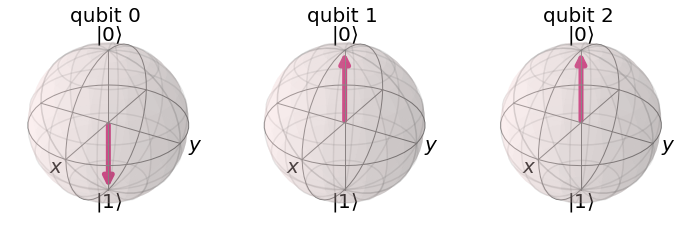

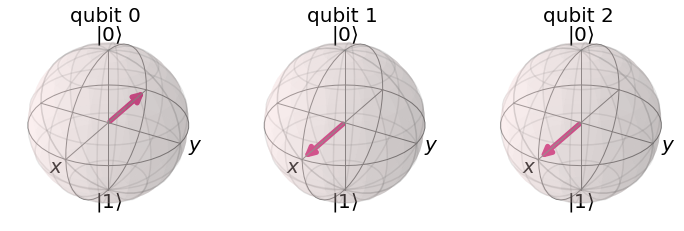

In [59]:
state = '100'
FourierCircuit = QuantumCircuit(len(state)) 
FourierCircuit.initialize(Statevector.from_label(state).data,FourierCircuit.qubits[::-1])
display(plot_bloch_multivector(Statevector.from_instruction(FourierCircuit).data))
FourierCircuit.append(MYQFT(len(state)),FourierCircuit.qubits)
display(plot_bloch_multivector(Statevector.from_instruction(FourierCircuit).data))

In [60]:
def a_x_mod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)        
    for iteration in range(x):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, x)
    c_U = U.control()
    return c_U
#####End of Function#####


In [61]:
n = 4; m = 4; a = 7

# set up quantum circuit
shor = QuantumCircuit(n+m, n)
shor.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
q_6: 
     
q_7: 
     
c: 4/

In [62]:
# initialize the qubits
shor.h(range(n))
shor.x(m+n-1)
shor.barrier()
shor.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     ├───┤ ░ 
q_3: ┤ H ├─░─
     └───┘ ░ 
q_4: ──────░─
           ░ 
q_5: ──────░─
           ░ 
q_6: ──────░─
     ┌───┐ ░ 
q_7: ┤ X ├─░─
     └───┘ ░ 
c: 4/════════

In [63]:
# apply modular exponentiation
for x in range(n):
    exponent = 2**x
    shor.append(a_x_mod15(a, exponent), 
        [x] + list(range(n, n+m)))
    
shor.barrier()
shor.draw()

┌───┐ ░                                                              ░ 
q_0: ┤ H ├─░────────■─────────────────────────────────────────────────────░─
     ├───┤ ░        │                                                     ░ 
q_1: ┤ H ├─░────────┼──────────────■──────────────────────────────────────░─
     ├───┤ ░        │              │                                      ░ 
q_2: ┤ H ├─░────────┼──────────────┼──────────────■───────────────────────░─
     ├───┤ ░        │              │              │                       ░ 
q_3: ┤ H ├─░────────┼──────────────┼──────────────┼──────────────■────────░─
     └───┘ ░ ┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐ ░ 
q_4: ──────░─┤0            ├┤0            ├┤0            ├┤0            ├─░─
           ░ │             ││             ││             ││             │ ░ 
q_5: ──────░─┤1            ├┤1            ├┤1            ├┤1            ├─░─
           ░ │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │ ░ 
q_6: ──────░─┤2            ├┤2            ├┤2            ├┤2            ├─░─
     ┌───┐ ░ │             ││             ││             ││             │ ░ 
q_7: ┤ X ├─░─┤3            ├┤3            ├┤3            ├┤3            ├─░─
     └───┘ ░ └─────────────┘└─────────────┘└─────────────┘└─────────────┘ ░ 
c: 4/═══════════════════════════════════════════════════════════════════════

In [64]:
# apply inverse QFT
from qiskit.circuit.library import QFT
shor.append(QFT(n).inverse(),range(n))
shor.barrier()
shor.draw()

┌───┐ ░                                                              ░ »
q_0: ┤ H ├─░────────■─────────────────────────────────────────────────────░─»
     ├───┤ ░        │                                                     ░ »
q_1: ┤ H ├─░────────┼──────────────■──────────────────────────────────────░─»
     ├───┤ ░        │              │                                      ░ »
q_2: ┤ H ├─░────────┼──────────────┼──────────────■───────────────────────░─»
     ├───┤ ░        │              │              │                       ░ »
q_3: ┤ H ├─░────────┼──────────────┼──────────────┼──────────────■────────░─»
     └───┘ ░ ┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐ ░ »
q_4: ──────░─┤0            ├┤0            ├┤0            ├┤0            ├─░─»
           ░ │             ││             ││             ││             │ ░ »
q_5: ──────░─┤1            ├┤1            ├┤1            ├┤1            ├─░─»
           ░ │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │ ░ »
q_6: ──────░─┤2            ├┤2            ├┤2            ├┤2            ├─░─»
     ┌───┐ ░ │             ││             ││             ││             │ ░ »
q_7: ┤ X ├─░─┤3            ├┤3            ├┤3            ├┤3            ├─░─»
     └───┘ ░ └─────────────┘└─────────────┘└─────────────┘└─────────────┘ ░ »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«     ┌───────┐ ░ 
«q_0: ┤0      ├─░─
«     │       │ ░ 
«q_1: ┤1      ├─░─
«     │  iqft │ ░ 
«q_2: ┤2      ├─░─
«     │       │ ░ 
«q_3: ┤3      ├─░─
«     └───────┘ ░ 
«q_4: ──────────░─
«               ░ 
«q_5: ──────────░─
«               ░ 
«q_6: ──────────░─
«               ░ 
«q_7: ──────────░─
«               ░ 
«c: 4/════════════
«

In [65]:
# measure the first n qubits
shor.measure(range(n), range(n))
shor.draw()


┌───┐ ░                                                              ░ »
q_0: ┤ H ├─░────────■─────────────────────────────────────────────────────░─»
     ├───┤ ░        │                                                     ░ »
q_1: ┤ H ├─░────────┼──────────────■──────────────────────────────────────░─»
     ├───┤ ░        │              │                                      ░ »
q_2: ┤ H ├─░────────┼──────────────┼──────────────■───────────────────────░─»
     ├───┤ ░        │              │              │                       ░ »
q_3: ┤ H ├─░────────┼──────────────┼──────────────┼──────────────■────────░─»
     └───┘ ░ ┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐ ░ »
q_4: ──────░─┤0            ├┤0            ├┤0            ├┤0            ├─░─»
           ░ │             ││             ││             ││             │ ░ »
q_5: ──────░─┤1            ├┤1            ├┤1            ├┤1            ├─░─»
           ░ │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │ ░ »
q_6: ──────░─┤2            ├┤2            ├┤2            ├┤2            ├─░─»
     ┌───┐ ░ │             ││             ││             ││             │ ░ »
q_7: ┤ X ├─░─┤3            ├┤3            ├┤3            ├┤3            ├─░─»
     └───┘ ░ └─────────────┘└─────────────┘└─────────────┘└─────────────┘ ░ »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                            »
«     ┌───────┐ ░ ┌─┐         
«q_0: ┤0      ├─░─┤M├─────────
«     │       │ ░ └╥┘┌─┐      
«q_1: ┤1      ├─░──╫─┤M├──────
«     │  iqft │ ░  ║ └╥┘┌─┐   
«q_2: ┤2      ├─░──╫──╫─┤M├───
«     │       │ ░  ║  ║ └╥┘┌─┐
«q_3: ┤3      ├─░──╫──╫──╫─┤M├
«     └───────┘ ░  ║  ║  ║ └╥┘
«q_4: ──────────░──╫──╫──╫──╫─
«               ░  ║  ║  ║  ║ 
«q_5: ──────────░──╫──╫──╫──╫─
«               ░  ║  ║  ║  ║ 
«q_6: ──────────░──╫──╫──╫──╫─
«               ░  ║  ║  ║  ║ 
«q_7: ──────────░──╫──╫──╫──╫─
«               ░  ║  ║  ║  ║ 
«c: 4/═════════════╩══╩══╩══╩═
«                  0  1  2  3